In [1]:
conda list

# packages in environment at /opt/anaconda3/envs/deep_learning:
#
# Name                    Version                   Build  Channel
_py-xgboost-mutex         2.0                       cpu_0  
absl-py                   2.1.0           py312hca03da5_0  
ace-tools                 0.0                      pypi_0    pypi
aext-assistant            4.1.0           py312hca03da5_jl4_0  
aext-assistant-server     4.1.0           py312hca03da5_0  
aext-core                 4.1.0           py312hca03da5_jl4_0  
aext-core-server          4.1.0           py312hca03da5_0  
aext-panels               4.1.0           py312hca03da5_0  
aext-panels-server        4.1.0           py312hca03da5_0  
aext-project-filebrowser-server 4.1.0           py312hb41f31a_0  
aext-share-notebook       4.1.0           py312hca03da5_0  
aext-share-notebook-server 4.1.0           py312hca03da5_0  
aext-shared               4.1.0           py312hca03da5_0  
aiohappyeyeballs          2.4.4           py312hca03da5_0  
aiohtt

In [16]:
import numpy as np
from scipy import linalg as la, signal
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigs, cg
from numpy.random import default_rng

np.set_printoptions(threshold=np.inf, linewidth=10**6, precision=4, suppress=True)

a0 = (np.arange(1, 21*9 + 1).reshape(21, 9) % 100) / 100.0
b0 = np.flipud(a0)
v  = np.linspace(0.1, 0.9, 9)

print("a0.shape / b0.shape / v.shape")
print(a0.shape, b0.shape, v.shape); print()

A = np.array([[2., 1., 0.],
              [1., 2., 1.],
              [0., 1., 2.]])
B = np.array([[1., 2., 3.],
              [4., 5., 6.],
              [7., 8., 9.]])
b = np.array([1., 2., 3.])
ac = np.array([[1+2j, 3-1j, 0+1j],
               [2+0j, -1+4j, 5-2j],
               [3+3j, -2+1j, 4+0j]])

print("ndims(a0)"); print(np.ndim(a0)); print()
print("numel(a0)"); print(np.size(a0)); print()
print("size(a0)"); print(np.array(a0.shape)); print()
print("size(a0,2)"); print(a0.shape[1]); print()

print("np.array([[1,2,3],[4,5,6]])")
print(np.array([[1.,2.,3.],[4.,5.,6.]])); print()

print("np.block([[I,1],[2,3I]])")
print(np.block([[np.eye(2), np.ones((2,2))],
                [2*np.ones((2,2)), 3*np.eye(2)]])); print()

a = a0.copy()
print("a[-1]"); print(a[-1]); print()
print("a[1,4]"); print(a[1,4]); print()
print("a[1,:]"); print(a[1,:]); print()
print("a[:5,:]"); print(a[:5,:]); print()
print("a[-5:,:]"); print(a[-5:,:]); print()
print("a[0:3,4:9]"); print(a[0:3,4:9]); print()
print("a[np.ix_([1,3,4],[0,2])]"); print(a[np.ix_([1,3,4],[0,2])]); print()
print("a[2:21:2,:]"); print(a[2:21:2,:]); print()
print("a[::2,:]"); print(a[::2,:]); print()
print("a[::-1,:]"); print(a[::-1,:]); print()
print("a[np.r_[:len(a),0],:]"); print(a[np.r_[:len(a),0],:]); print()

print("a.T"); print(a.T); print()
print("ac.conj().T"); print(np.conjugate(ac).T); print()

print("A @ B"); print(A @ B); print()
print("A * B"); print(A * B); print()
print("A / B"); print(A / B); print()
print("A**3"); print(A**3); print()

print("(a0 > 0.5)"); print((a0 > 0.5).astype(int)); print()
print("np.nonzero(a0>0.5)"); print(np.array(np.nonzero(a0>0.5))); print()
cols = np.nonzero(v > 0.5)[0]
print("a0[:, np.nonzero(v>0.5)[0]]"); print(a0[:, cols]); print()
v_col = v.reshape(-1,1)
print("a0[:, v.T > 0.5]"); print(a0[:, (v_col.T > 0.5).ravel()]); print()

a = a0.copy(); a[a < 0.5] = 0
print("a[a<0.5]=0"); print(a); print()
print("a0 * (a0>0.5)"); print(a0 * (a0 > 0.5)); print()
a = a0.copy(); a[:] = 3
print("a[:]=3"); print(a); print()

x = a0.copy(); y_view = x[1,:].copy(); y_ref  = x[1,:]; x[1,0] = 123.456
print("y_view[0] / y_ref[0]"); print(np.array([y_view[0], y_ref[0]])); print()
print("x.flatten()"); print(x.flatten()); print()
print("x.flatten('F')"); print(x.flatten('F')); print()

print("1:10"); print(np.arange(1., 11.)); print()
print("0:9"); print(np.arange(10.)); print()
print("[1:10]'"); print(np.arange(1.,11.)[:, np.newaxis]); print()
print("np.r_[1:10:10j]"); print(np.r_[1:10:10j]); print()

print("zeros(3,4) / ones(3,4) / eye(3)")
print(np.zeros((3,4))); print(np.ones((3,4))); print(np.eye(3)); print()
print("zeros(3,4,5)"); print(np.zeros((3,4,5))); print()

print("diag(a) / diag(v,0)")
v_demo = np.array([10., 20., 30.])
A_demo = np.array([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]])
print(np.diag(A_demo)); print(np.diag(v_demo, 0)); print()

print("rng(42) ; rand(3,4)")
rng = default_rng(42); print(rng.random((3,4))); print()

print("linspace(1,3,4)"); print(np.linspace(1,3,4)); print()

print("meshgrid lists")
X, Y = np.meshgrid([1,2,4],[2,4,5])
print("X\n", X, "\nY\n", Y); print()
print("mgrid"); print(np.mgrid[0:9., 0:6.][0]); print(np.mgrid[0:9., 0:6.][1]); print()
print("ogrid shapes")
ogx, ogy = np.ogrid[0:9., 0:6.]; print(ogx.shape, ogy.shape); print()
print("ix_ shapes")
ix0, ix1 = np.ix_(np.r_[0:9.], np.r_[0:6.]); print(ix0.shape, ix1.shape); print()

print("repmat -> tile")
print(np.tile(np.array([[1.,2.],[3.,4.]]), (2,3))); print()

print("[a b] / [a; b] / column_stack / c_ / r_")
left = np.array([[1.,2.],[3.,4.]])
right = np.array([[5.,6.],[7.,8.]])
print(np.hstack((left, right)))
print(np.vstack((left, right)))
print(np.column_stack((np.array([1,2,3]), np.array([4,5,6]))))
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])
print(np.r_[np.array([[1,2]]), np.array([[3,4]])]); print()
print("np.concatenate row-wise")
a_row = np.array([[1., 2., 3.]])
b_row = np.array([[4., 5., 6.]])
print(np.concatenate((a_row, b_row))); print()

print("max/max/nanmax/column/row/maximum")
M = np.array([[1., np.nan, 3.],[4.,5.,6.]])
print("a.max()/nanmax:", M.max(), np.nanmax(M))
print("max columns:", M.max(0))
print("max rows:", M.max(1))
print("maximum:", np.maximum(np.array([1,5,2]), np.array([2,4,3]))); print()

print("norm(v)")
v_demo2 = np.array([3., 4., 12.])
print(np.linalg.norm(v_demo2)); print()

print("logical_and / logical_or")
p = np.array([True, False, True]); q = np.array([False, False, True])
print(np.logical_and(p,q)); print(np.logical_or(p,q)); print()

print("bitand/ bitor via & and |")
x_bits = np.array([1,3,5], dtype=int); y_bits = np.array([2,3,1], dtype=int)
print(x_bits & y_bits); print(x_bits | y_bits); print()

print("solve(A,b)"); print(la.solve(A, b)); print()
print("inv(A)"); print(la.inv(A)); print()
print("pinv(A)"); print(la.pinv(A)); print()
print("det(A)"); print(la.det(A)); print()
print("trace(A)"); print(np.trace(A)); print()
print("rank(A)"); print(np.linalg.matrix_rank(A)); print()
print("norms [2, fro, 1, inf]")
print(np.array([la.norm(A,2), la.norm(A,'fro'), la.norm(A,1), la.norm(A,np.inf)])); print()

print("eig(A): w"); w, V = la.eig(A); print(w); print()
print("eig(A): V"); print(V); print()

print("generalized eig(A,B)")
B_spd = np.array([[3.,1.,0.],[1.,3.,1.],[0.,1.,3.]])
D_gen, V_gen = la.eig(A, B_spd)
print("eigvals:", D_gen); print("eigvecs:\n", V_gen); print()

print("eigs (sparse, k=1)")
S_sparse = csr_matrix(np.array([[2.,1.,0.],[1.,2.,1.],[0.,1.,2.]]))
vals, vecs = eigs(S_sparse, k=1)
print("eigs vals:", vals); print("eigs vecs:\n", vecs); print()

print("svd")
U, s, Vh = la.svd(A); print("s\n", s); print("U\n", U); print("Vh\n", Vh); print()

print("qr R"); Q, R = la.qr(A); print(R); print()

print("chol(A^T A + I)"); S = A.T @ A + np.eye(3); print(la.cholesky(S)); print()

print("LU: P,L,U and check")
P,L,U = la.lu(A_demo); print("P=\n", P, "\nL=\n", L, "\nU=\n", U); print("P@L@U=\n", P@L@U); print()

print("a\\b vs b/a")
print("x from a\\b:", la.solve(A, b))
C = np.array([[1., 0., 2.],[3., 4., 5.]])
X_right = la.solve(A.T, C.T).T
print("X from b/a (solve A.T X.T = C.T):\n", X_right)
print("Check X @ A:\n", X_right @ A); print()

print("cg")
A_spd = np.array([[4.,1.],[1.,3.]])
b_spd = np.array([1.,2.])
x_cg, info = cg(csr_matrix(A_spd), b_spd, maxiter=1000, tol=1e-12)
print("cg solution:", x_cg, "info:", info); print()

print("fft / ifft")
sig = np.array([1., 2., 3., 4.])
F = np.fft.fft(sig); fi = np.fft.ifft(F)
print(F); print(fi); print()

print("sort columns / sort rows / sortrows by first column")
S = np.array([[3.,2.,1.],[6.,5.,4.],[9.,8.,7.]])
print("sort columns:\n", np.sort(S, axis=0))
print("sort rows:\n", np.sort(S, axis=1))
I = np.argsort(S[:,0]); print("rows sorted by col0:\n", S[I,:]); print()
print("in-place sort a.sort(axis=0)")
S2 = np.array([[3.,2.,1.],[6.,5.,4.],[9.,8.,7.]])
S2.sort(axis=0); print(S2); print()

print("lstsq (x = Z\\y)")
Z = np.array([[1.,1.],[1.,2.],[1.,3.],[1.,4.]])
y = np.array([6.,5.,7.,10.])
coef, *_ = la.lstsq(Z, y); print(coef); print()

print("decimate ~ resample")
xsig = np.arange(20.); q = 3
down = signal.resample(xsig, int(np.ceil(len(xsig)/q))); print(down); print()

print("unique / squeeze")
u = np.array([1,2,2,3,3,3,4]); print(np.unique(u))
sq = np.array([[[1,2,3]]]); print("before squeeze:", sq.shape, "after:", sq.squeeze().shape); print()


a0.shape / b0.shape / v.shape
(21, 9) (21, 9) (9,)

ndims(a0)
2

numel(a0)
189

size(a0)
[21  9]

size(a0,2)
9

np.array([[1,2,3],[4,5,6]])
[[1. 2. 3.]
 [4. 5. 6.]]

np.block([[I,1],[2,3I]])
[[1. 0. 1. 1.]
 [0. 1. 1. 1.]
 [2. 2. 3. 0.]
 [2. 2. 0. 3.]]

a[-1]
[0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89]

a[1,4]
0.14

a[1,:]
[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18]

a[:5,:]
[[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
 [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18]
 [0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27]
 [0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36]
 [0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45]]

a[-5:,:]
[[0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53]
 [0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62]
 [0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71]
 [0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 ]
 [0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89]]

a[0:3,4:9]
[[0.05 0.06 0.07 0.08 0.09]
 [0.14 0.15 0.16 0.17 0.18]
 [0.23 0.24 0.25 0.26 0.27]]

a[np.ix_([1,3,4],[0,2])]
[[

/var/folders/hv/4tjkt0wd6nj4v48c69gdgty80000gn/T/ipykernel_55577/3100208607.py:183: DeprecationWarning: 'scipy.sparse.linalg.cg' keyword argument `tol` is deprecated in favor of `rtol` and will be removed in SciPy v1.14.0. Until then, if set, it will override `rtol`.
  x_cg, info = cg(csr_matrix(A_spd), b_spd, maxiter=1000, tol=1e-12)


In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=10**6, precision=4, suppress=True)

print("RANGES 1:10 / 0:9 / column vector [1:10]'")
print(np.arange(1., 11.)); print(np.arange(10.)); print(np.arange(1., 11.)[:, np.newaxis]); print()

print("zeros / ones / eye")
print(np.zeros((3,4))); print(np.ones((3,4))); print(np.eye(3)); print()

print("diag(a) and diag(v,0)")
v_demo = np.array([10., 20., 30.])
A_demo = np.array([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]])
print(np.diag(A_demo)); print(np.diag(v_demo, 0)); print()

print("rng(42) ; rand(3,4)  (NumPy default_rng)")
from numpy.random import default_rng
rng = default_rng(42)
print(rng.random((3,4))); print()

print("linspace(1,3,4)")
print(np.linspace(1,3,4)); print()

print("meshgrid / mgrid / ogrid / ix_")
X, Y = np.meshgrid([1,2,4],[2,4,5])
print("meshgrid lists -> X\n", X, "\nY\n", Y); print()
print("mgrid")
print(np.mgrid[0:9., 0:6.][0]); print(np.mgrid[0:9., 0:6.][1]); print()
print("ogrid best for eval")
ogx, ogy = np.ogrid[0:9., 0:6.]
print(ogx.shape, ogy.shape); print()
print("ix_ best for eval on vectors")
print(np.ix_(np.r_[0:9.], np.r_[0:6.])[0].shape, np.ix_(np.r_[0:9.], np.r_[0:6.])[1].shape); print()

print("repmat(a,m,n) -> tile")
print(np.tile(np.array([[1.,2.],[3.,4.]]), (2,3))); print()

print("column/row concatenation: hstack / vstack / column_stack / c_ / r_")
left = np.array([[1.,2.],[3.,4.]])
right = np.array([[5.,6.],[7.,8.]])
print(np.hstack((left, right)))
print(np.vstack((left, right)))
print(np.column_stack((np.array([1,2,3]), np.array([4,5,6]))))
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])
print(np.r_[np.array([[1,2]]), np.array([[3,4]])]); print()

print("max(max(a)) / max(a) by column / max(a,[],2) by row / maximum(a,b)")
M = np.array([[1., np.nan, 3.],[4.,5.,6.]])
print("a.max() / nanmax:", M.max(), np.nanmax(M))
print("max by columns:", M.max(0))
print("max by rows:", M.max(1))
print("element-wise maximum with B:", np.maximum(np.array([1,5,2]), np.array([2,4,3]))); print()

print("logical_and / logical_or (elementwise)")
p = np.array([True, False, True])
q = np.array([False, False, True])
print(np.logical_and(p,q)); print(np.logical_or(p,q)); print()

print("bitwise AND/OR (&, |) on integers")
x_bits = np.array([1,3,5], dtype=int)
y_bits = np.array([2,3,1], dtype=int)
print(x_bits & y_bits); print(x_bits | y_bits); print()

print("lstsq (x = Z\\y)")
Z = np.array([[1.,1.],[1.,2.],[1.,3.],[1.,4.]])
y = np.array([6.,5.,7.,10.])
coef, *_ = la.lstsq(Z, y)
print(coef); print()

print("generalized eig (D,V) = eig(A,B)")
B_spd = np.array([[3.,1.,0.],[1.,3.,1.],[0.,1.,3.]])
D_gen, V_gen = la.eig(A, B_spd)
print("eigvals:", D_gen); print("eigvecs:\n", V_gen); print()

print("eigs (sparse, k=3 largest)  -- may return complex dtype")

S_sparse = csr_matrix(np.array([[2.,1.,0.],[1.,2.,1.],[0.,1.,2.]]))
vals, vecs = eigs(S_sparse, k=1)
print("eigs vals:", vals); print("eigs vecs:\n", vecs); print()

print("cg (conjugate gradients) on SPD")
A_spd = np.array([[4.,1.],[1.,3.]])
b_spd = np.array([1.,2.])
x_cg, info = cg(csr_matrix(A_spd), b_spd, maxiter=1000, tol=1e-12)
print("cg solution:", x_cg, "info:", info); print()

print("FFT / IFFT")
sig = np.array([1., 2., 3., 4.])
F = np.fft.fft(sig)
fi = np.fft.ifft(F)
print(F); print(fi); print()

print("sort each column / sort each row / sortrows by first column")
S = np.array([[3.,2.,1.],[6.,5.,4.],[9.,8.,7.]])
print("sort columns:\n", np.sort(S, axis=0))
print("sort rows:\n", np.sort(S, axis=1))
I = np.argsort(S[:,0])
print("rows sorted by col0:\n", S[I,:]); print()

print("unique / squeeze")
u = np.array([1,2,2,3,3,3,4])
print(np.unique(u))
sq = np.array([[[1,2,3]]])
print("before squeeze:", sq.shape, "after:", sq.squeeze().shape); print()

print("decimate(x,q) ~ signal.resample(x, ceil(len(x)/q))")
xsig = np.arange(20.)
q = 3
down = signal.resample(xsig, int(np.ceil(len(xsig)/q)))
print(down); print()

print("a(:, find(v>0.5)) and a(:, v.T > 0.5) forms")
v_col = v.reshape(-1,1)  # column vector (9,1)
print(a0[:, np.nonzero(v > 0.5)[0]])
print(a0[:, (v_col.T > 0.5).ravel()]); print()

print("LU factorization: P,L,U (A == P@L@U)")
P,L,U = la.lu(A_demo)
print("P=\n", P, "\nL=\n", L, "\nU=\n", U)
print("Check P@L@U:\n", P@L@U); print()

print("zeros(3,4,5)  -> 3D zeros")
print(np.zeros((3, 4, 5))); print()

print("Right division b/a")
C = np.array([[1., 0., 2.],
              [3., 4., 5.]])
X_right = la.solve(A.T, C.T).T
print("X =\n", X_right)
print("Check X @ A =\n", X_right @ A); print()

print("Vector norm")
v_demo2 = np.array([3., 4., 12.])
print(np.linalg.norm(v_demo2)); print()

print("Row concatenation with np.concatenate((a,b))")
a_row = np.array([[1., 2., 3.]])
b_row = np.array([[4., 5., 6.]])
print(np.concatenate((a_row, b_row))); print()

print("In-place sort a.sort(axis=0)")
S2 = np.array([[3.,2.,1.],[6.,5.,4.],[9.,8.,7.]])
S2.sort(axis=0)
print(S2); print()

print("Range via np.r_[1:10:10j]")
print(np.r_[1:10:10j]); print()

RANGES 1:10 / 0:9 / column vector [1:10]'
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]

zeros / ones / eye
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

diag(a) and diag(v,0)
[1. 5. 9.]
[[10.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0. 30.]]

rng(42) ; rand(3,4)  (NumPy default_rng)
[[0.774  0.4389 0.8586 0.6974]
 [0.0942 0.9756 0.7611 0.7861]
 [0.1281 0.4504 0.3708 0.9268]]

linspace(1,3,4)
[1.     1.6667 2.3333 3.    ]

meshgrid / mgrid / ogrid / ix_
meshgrid lists -> X
 [[1 2 4]
 [1 2 4]
 [1 2 4]] 
Y
 [[2 2 2]
 [4 4 4]
 [5 5 5]]

mgrid
[[0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7.]
 [8. 8. 8. 8. 8. 8.]]
[[0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1.

/var/folders/hv/4tjkt0wd6nj4v48c69gdgty80000gn/T/ipykernel_55577/715816991.py:82: DeprecationWarning: 'scipy.sparse.linalg.cg' keyword argument `tol` is deprecated in favor of `rtol` and will be removed in SciPy v1.14.0. Until then, if set, it will override `rtol`.
  x_cg, info = cg(csr_matrix(A_spd), b_spd, maxiter=1000, tol=1e-12)


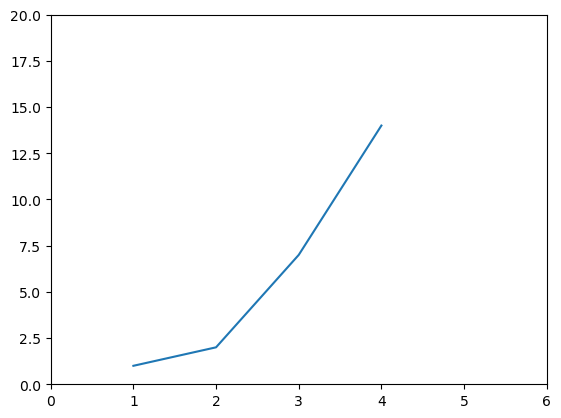

In [13]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4], [1,2,7,14])
plt.axis([0, 6, 0, 20])
plt.show()

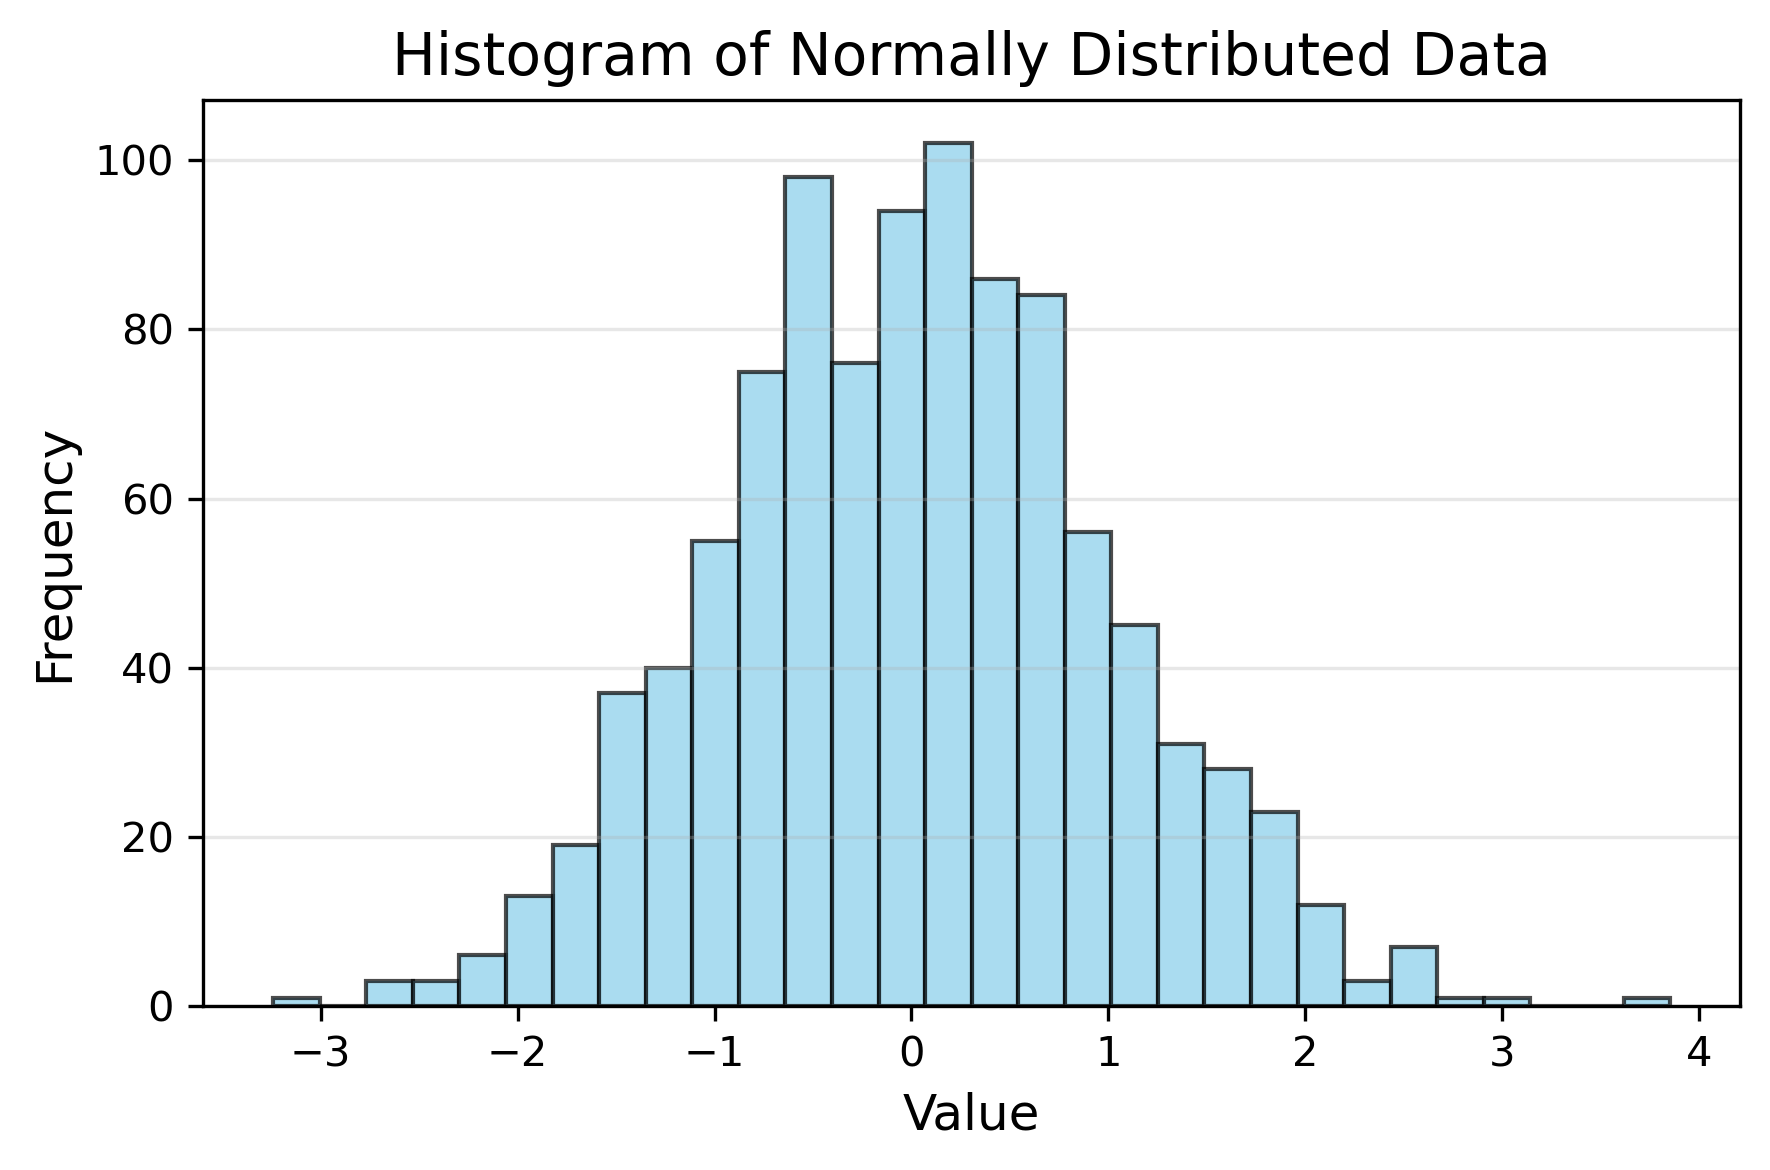

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.randn(1000)

plt.figure(figsize=(6,4), dpi=300)
plt.hist(data, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Normally Distributed Data", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("task4_histogram.png", dpi=300)
plt.show()
